In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.losses import Loss
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose,MaxPooling2D, Concatenate,Cropping2D, Dropout

2023-04-02 11:00:43.252342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 11:00:47.296056: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-02 11:00:47.296120: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 11:01:02.686137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
! wget https://github.com/nicknochnack/SegmentationAPI/blob/main/cancer_weights.h5?raw=true -O cancer_weights.h5

--2023-03-18 16:22:42--  https://github.com/nicknochnack/SegmentationAPI/blob/main/cancer_weights.h5?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/nicknochnack/SegmentationAPI/raw/main/cancer_weights.h5 [following]
--2023-03-18 16:22:42--  https://github.com/nicknochnack/SegmentationAPI/raw/main/cancer_weights.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nicknochnack/SegmentationAPI/main/cancer_weights.h5 [following]
--2023-03-18 16:22:42--  https://raw.githubusercontent.com/nicknochnack/SegmentationAPI/main/cancer_weights.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [4]:
class SegmentationModel(): 
    def __init__(self): 
        inputData = Input(shape=(256,256,3))
        c1 = Conv2D(64, 3, activation='relu', padding='same')(inputData)
        c2 = Conv2D(64, 3, activation='relu', padding='same')(c1)

        c3 = MaxPooling2D()(c2)
        c4 = Conv2D(128, 3, activation='relu', padding='same')(c3)
        c5 = Conv2D(128, 3, activation='relu', padding='same')(c4)
        c5 = Dropout(0.5)(c5)

        c6 = MaxPooling2D()(c5)
        c7 = Conv2D(256, 3, activation='relu', padding='same')(c6)
        c8 = Conv2D(256, 3, activation='relu', padding='same')(c7)
        c8 = Dropout(0.5)(c8)

        c9 = MaxPooling2D()(c8)
        c10 = Conv2D(512, 3, activation='relu', padding='same')(c9)
        c11 = Conv2D(512, 3, activation='relu', padding='same')(c10)
        c11 = Dropout(0.5)(c11)

        c12 = Conv2D(1024, 3, activation='relu', padding='same')(c11)
        c12 = Dropout(0.5)(c12)

        c12 = Concatenate()([c12, Cropping2D(cropping=((16, 16), (16, 16)))(c8)])
        u1 = Conv2DTranspose(1024, 2, (2,2))(c12)
        u2 = Conv2D(512, 3, activation='relu', padding='same')(u1)
        u3 = Conv2D(512, 3, activation='relu', padding='same')(u2)
        u3 = Dropout(0.5)(u3)

        u3 = Concatenate()([u3, Cropping2D(cropping=((32, 32), (32, 32)))(c5)])
        u4 = Conv2DTranspose(512, 2, (2,2))(u3)
        u5 = Conv2D(256, 3, activation='relu', padding='same')(u4)
        u6 = Conv2D(256, 3, activation='relu', padding='same')(u5)
        u6 = Dropout(0.5)(u6)

        u6 = Concatenate()([u6, Cropping2D(cropping=((64, 64), (64, 64)))(c2)])
        u7 = Conv2DTranspose(256, 2, (2,2))(u6)
        u8 = Conv2D(128, 3, activation='relu', padding='same')(u7)
        u9 = Conv2D(6, 1, activation='softmax', padding='same')(u8)

        self.model = Model(inputs=inputData, outputs=u9)


In [5]:
model = SegmentationModel().model
model.load_weights('cancer_weights.h5') 
model.summary()

2023-04-02 11:01:46.623339: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mrx/.local/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-02 11:01:46.623373: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-02 11:01:46.623399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mrx): /proc/driver/nvidia/version does not exist
2023-04-02 11:01:46.623720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

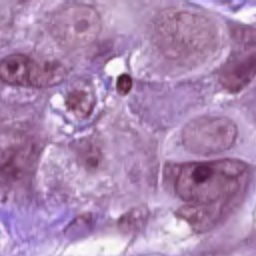

In [6]:
path = "testimg.jpg"

In [7]:
image = tf.keras.utils.load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(256,256),
    interpolation='nearest',
    keep_aspect_ratio=False
)

In [8]:
yhat = model.predict(tf.expand_dims(image, axis=0))

1/1 [==============================] - 5s 5s/step


In [9]:
yhat = np.squeeze(np.where(yhat > 0.3, 1.0, 0.0))

In [18]:
x = cv2.imread(path)

In [14]:
print(type(yhat[:,:,:]))

<class 'numpy.ndarray'>


In [16]:
for i in range(6) :
    cv2.imwrite( "results.jpg", yhat[:,:,i])

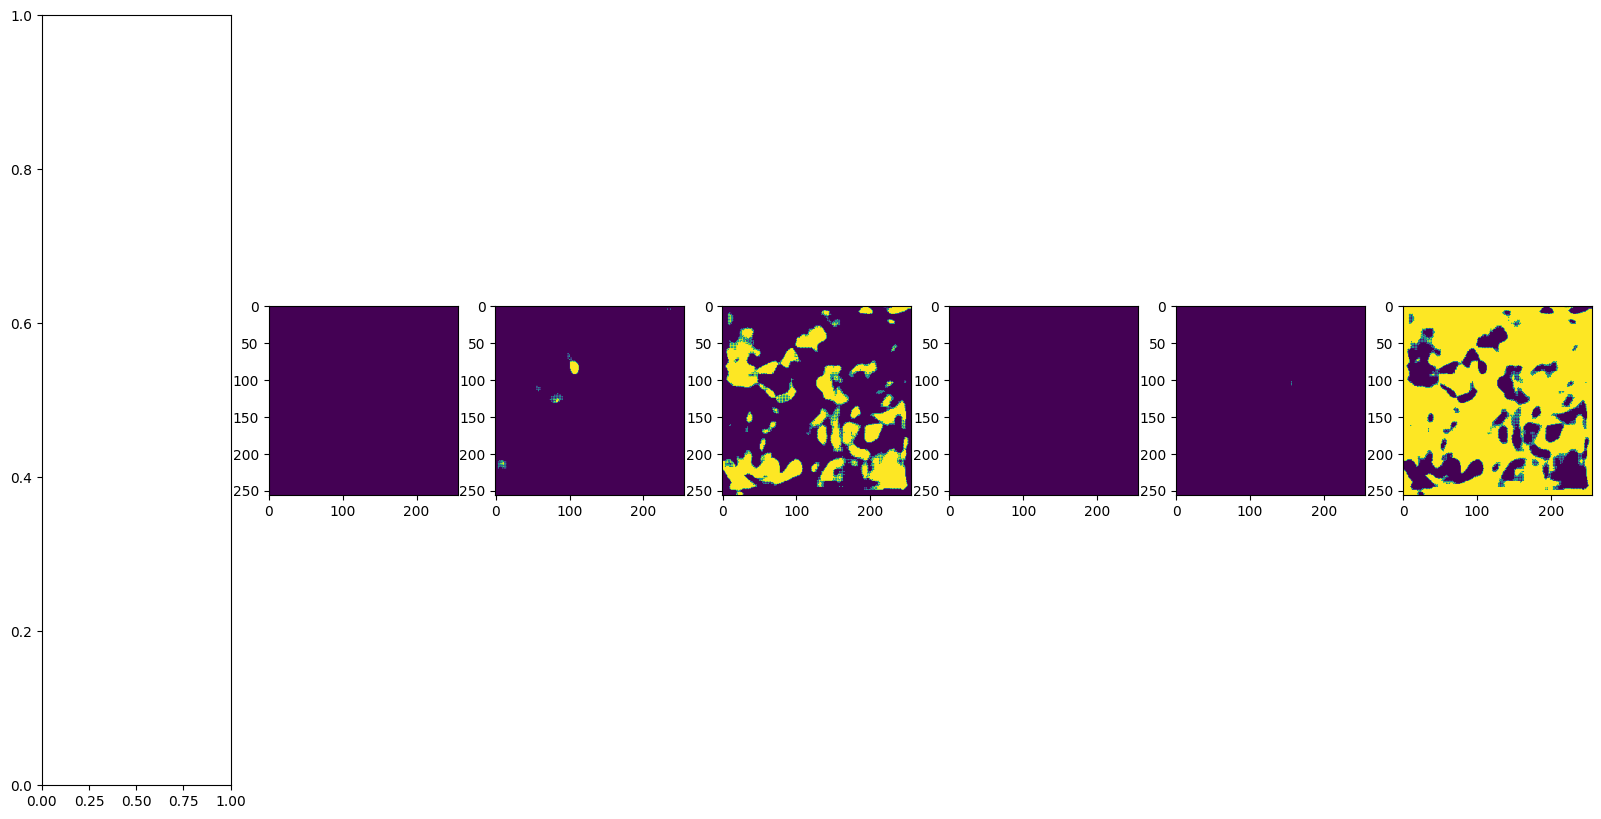

In [20]:
fig, ax = plt.subplots(1,6, figsize=(20,10))
#ax[0].imshow(x) 
for i in range(6):
    ax[i+1].imshow(yhat[:,:,i])
    fig.savefig("results.jpg")